# Lab 5 - Data Visualization

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np

## NFL Offense Data

1. Import the NFL week 3, 4, and 5 data and add a week column to dataset and set the value to 3, 4, or 5 for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Also merge the nfl_teams.csv data to this dataframe so that the division and conference info is included.

In [145]:
week3 = pd.read_csv("nfloffenseweek3.csv")
week4 = pd.read_csv("nfloffenseweek4.csv")
week5 = pd.read_csv("nfloffenseweek5.csv")
teams = pd.read_csv("nfl_teams.csv")


In [146]:
teams.rename(columns={'Name':'team'}, inplace=True)


In [147]:
data1 = pd.merge(teams, week3, how='outer')
data2 = pd.merge(week4, week5, how='outer')
data = pd.merge(data1, data2, how='outer')
data


,ID,team,Abbreviation,Conference,Division,rank,games,points_scored,total_yards,offensive_plays,...,rushing_yards,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points
0,1.0,Arizona Cardinals,ARI,NFC,West,13.0,3.0,62.0,1060.0,222.0,...,316.0,3.0,4.5,25.0,23.0,219.0,4.0,34.5,3.4,15.09
1,2.0,Atlanta Falcons,ATL,NFC,South,9.0,3.0,80.0,1063.0,181.0,...,470.0,4.0,4.9,25.0,15.0,99.0,10.0,43.8,21.9,24.85
2,3.0,Baltimore Ravens,BAL,AFC,North,1.0,3.0,99.0,1141.0,166.0,...,406.0,2.0,5.6,18.0,8.0,44.0,5.0,42.9,8.6,35.63
3,4.0,Buffalo Bills,BUF,AFC,East,3.0,3.0,91.0,1324.0,213.0,...,337.0,1.0,4.7,22.0,20.0,136.0,6.0,46.7,16.7,47.46
4,5.0,Carolina Panthers,CAR,NFC,South,14.0,3.0,62.0,829.0,163.0,...,345.0,2.0,4.7,19.0,17.0,174.0,7.0,35.3,5.9,-5.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,NaN,Chicago Bears,NaN,NaN,NaN,28.0,5.0,86.0,1370.0,266.0,...,787.0,5.0,4.9,38.0,27.0,211.0,9.0,36.5,13.5,-5.91
95,NaN,Los Angeles Rams,NaN,NaN,NaN,29.0,5.0,80.0,1499.0,312.0,...,312.0,3.0,3.2,19.0,17.0,156.0,8.0,31.4,23.5,-19.19
96,NaN,Pittsburgh Steelers,NaN,NaN,NaN,30.0,5.0,77.0,1479.0,306.0,...,443.0,4.0,3.9,27.0,30.0,213.0,6.0,26.3,12.3,-25.01
97,NaN,Denver Broncos,NaN,NaN,NaN,31.0,5.0,75.0,1718.0,318.0,...,563.0,2.0,4.3,26.0,44.0,335.0,8.0,29.3,10.3,-18.28


In [148]:
stacked_files = sorted(glob('nflo*.csv'))
stacked_files

['nfloffenseweek3.csv', 'nfloffenseweek4.csv', 'nfloffenseweek5.csv']

In [149]:
all_data = pd.concat((pd.read_csv(file) for file in stacked_files), ignore_index=True)
all_data


,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,...,rushing_yards,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points
0,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,...,406,2,5.6,18,8,44,5,42.9,8.6,35.63
1,2,Detroit Lions,3,95,1227,203,6.0,2,0,63,...,511,5,5.9,20,15,129,5,40.5,5.4,31.05
2,3,Buffalo Bills,3,91,1324,213,6.2,5,3,77,...,337,1,4.7,22,20,136,6,46.7,16.7,47.46
3,4,Kansas City Chiefs,3,88,1122,180,6.2,3,2,68,...,279,2,4.1,15,15,124,8,45.2,6.5,40.73
4,5,Philadelphia Eagles,3,86,1341,208,6.4,1,0,73,...,451,6,4.4,26,23,173,6,39.4,3.0,45.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,28,Chicago Bears,5,86,1370,266,5.2,8,4,73,...,787,5,4.9,38,27,211,9,36.5,13.5,-5.91
92,29,Los Angeles Rams,5,80,1499,312,4.8,12,5,93,...,312,3,3.2,19,17,156,8,31.4,23.5,-19.19
93,30,Pittsburgh Steelers,5,77,1479,306,4.8,9,3,92,...,443,4,3.9,27,30,213,6,26.3,12.3,-25.01
94,31,Denver Broncos,5,75,1718,318,5.4,6,3,84,...,563,2,4.3,26,44,335,8,29.3,10.3,-18.28


In [150]:

all_data.rename(columns={'1st_downs':'first_downs'},inplace=True)

In [151]:
all_data

,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,first_downs,...,rushing_yards,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points
0,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,...,406,2,5.6,18,8,44,5,42.9,8.6,35.63
1,2,Detroit Lions,3,95,1227,203,6.0,2,0,63,...,511,5,5.9,20,15,129,5,40.5,5.4,31.05
2,3,Buffalo Bills,3,91,1324,213,6.2,5,3,77,...,337,1,4.7,22,20,136,6,46.7,16.7,47.46
3,4,Kansas City Chiefs,3,88,1122,180,6.2,3,2,68,...,279,2,4.1,15,15,124,8,45.2,6.5,40.73
4,5,Philadelphia Eagles,3,86,1341,208,6.4,1,0,73,...,451,6,4.4,26,23,173,6,39.4,3.0,45.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,28,Chicago Bears,5,86,1370,266,5.2,8,4,73,...,787,5,4.9,38,27,211,9,36.5,13.5,-5.91
92,29,Los Angeles Rams,5,80,1499,312,4.8,12,5,93,...,312,3,3.2,19,17,156,8,31.4,23.5,-19.19
93,30,Pittsburgh Steelers,5,77,1479,306,4.8,9,3,92,...,443,4,3.9,27,30,213,6,26.3,12.3,-25.01
94,31,Denver Broncos,5,75,1718,318,5.4,6,3,84,...,563,2,4.3,26,44,335,8,29.3,10.3,-18.28


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

- Put all together then got the average... Not exactly sure if this is wanted

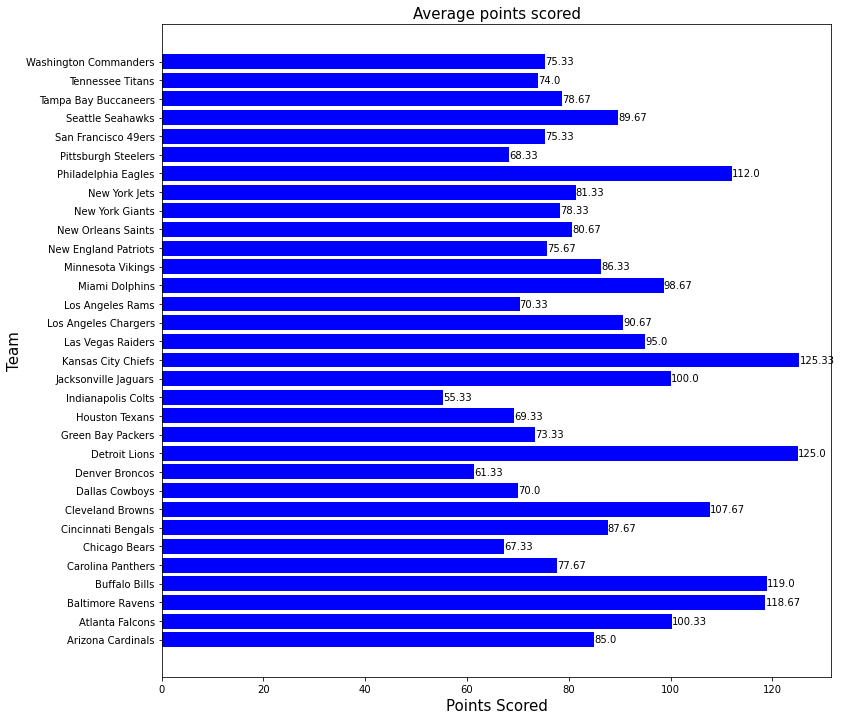

In [208]:
plt.figure(figsize=(12, 12))
Group = all_data.groupby('team').points_scored.mean()
barhplot = plt.barh(Group.index, Group, color="blue")
plt.title("Average points scored",fontsize=15)
plt.xlabel("Points Scored",fontsize=15)
plt.ylabel("Team",fontsize=15)
plt.bar_label(barhplot, labels = round(Group,2))

plt.show()


- Not sure if I need to do one week at a time.. might put them down below but I averaged them all above into one chart instead of three to make it easier for me

<BarContainer object of 32 artists>

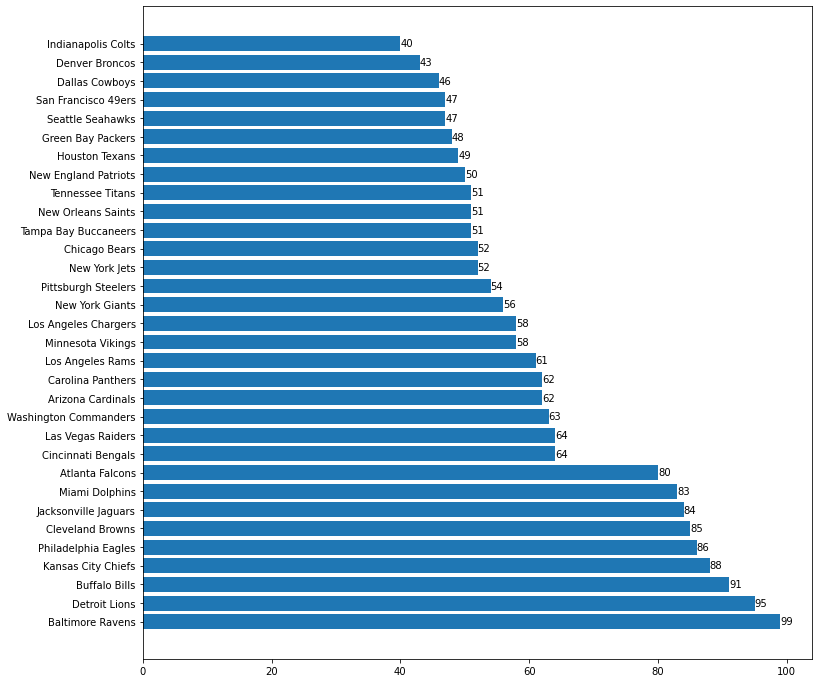

In [153]:
plt.figure(figsize=(12, 12))

#fig, ax = plt.subplots()
barhplot = plt.barh(week3.team, week3.points_scored )
plt.bar_label(barhplot, labels = week3.points_scored )
barhplot


3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

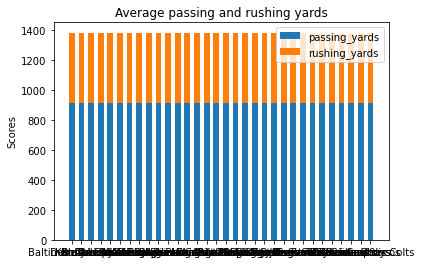

In [170]:
labels = all_data.team
group = all_data.passing_yards.mean()
women_means = all_data.rushing_yards.mean()

width = 0.6      # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, group, width, label='passing_yards')
ax.bar(labels, women_means, width, bottom=group,
       label='rushing_yards')

ax.set_ylabel('Scores')
ax.set_title('Average passing and rushing yards')
ax.legend()

plt.show()

4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

6. Plot the average total points vs average yards per play for each team as a bar chart (with total points on the y-axis and yards per play on the x-axis).

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)